In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import math
import matplotlib.pyplot as plt
import warnings
from datetime import datetime
warnings.filterwarnings("ignore")

In [2]:
df = yf.download('NVDA', start='2023-01-01', end='2024-01-01')
df.reset_index(inplace = True, drop = False)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,148.509995,149.960007,140.960007,143.149994,143.079788,40127700
1,2023-01-04,145.669998,148.529999,142.410004,147.490005,147.417679,43132400
2,2023-01-05,144.910004,145.639999,141.479996,142.649994,142.580032,38916800
3,2023-01-06,144.740005,150.100006,140.339996,148.589996,148.517120,40504400
4,2023-01-09,152.839996,160.559998,151.410004,156.279999,156.203384,50423100


In [3]:
for i in range (0, len(df)):
  date = df.loc[i, 'Date']
  day_index = date.weekday()
  days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
  df.loc[i, 'Day'] = days[day_index]
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day
0,2023-01-03,148.509995,149.960007,140.960007,143.149994,143.079788,40127700,Tuesday
1,2023-01-04,145.669998,148.529999,142.410004,147.490005,147.417679,43132400,Wednesday
2,2023-01-05,144.910004,145.639999,141.479996,142.649994,142.580032,38916800,Thursday
3,2023-01-06,144.740005,150.100006,140.339996,148.589996,148.517120,40504400,Friday
4,2023-01-09,152.839996,160.559998,151.410004,156.279999,156.203384,50423100,Monday


In [4]:
mean = []
i = 0
for day in days:
  data = df[df['Day'] == day]
  mean.append(data['Close'].mean())
  i += 1
print(mean)

[368.5844458685981, 363.63804058000153, 363.47749974177435, 364.45980475930605, 368.6868600284352]


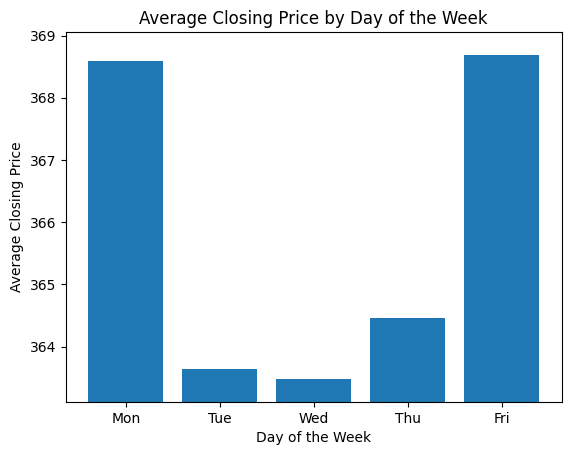

In [5]:
plt.bar(range(5), mean)
plt.xticks(range(5), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri'])
plt.ylim(min(mean)*0.999, max(mean)*1.001)
plt.xlabel('Day of the Week')
plt.ylabel('Average Closing Price')
plt.title('Average Closing Price by Day of the Week')
plt.show()

In [6]:
def rolling_mean(data, col, t):
  for i in range(0, t):
    data.loc[i, 'Rolling Mean'] = data[col].iloc[0:i+1].mean()
  for i in range(t, len(data)):
    data.loc[i, 'Rolling Mean'] = data[col].iloc[i-t:i].mean()
  return data

In [7]:
data = rolling_mean(df, 'Close', 7)
data.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Rolling Mean
0,2023-01-03,148.509995,149.960007,140.960007,143.149994,143.079788,40127700,Tuesday,143.149994
1,2023-01-04,145.669998,148.529999,142.410004,147.490005,147.417679,43132400,Wednesday,145.320000
2,2023-01-05,144.910004,145.639999,141.479996,142.649994,142.580032,38916800,Thursday,144.429998
3,2023-01-06,144.740005,150.100006,140.339996,148.589996,148.517120,40504400,Friday,145.469997
4,2023-01-09,152.839996,160.559998,151.410004,156.279999,156.203384,50423100,Monday,147.631998
5,2023-01-10,155.070007,159.619995,154.720001,159.089996,159.011993,38410100,Tuesday,149.541664
6,2023-01-11,158.399994,160.279999,155.630005,160.009995,159.931503,35328500,Wednesday,151.037140
7,2023-01-12,161.000000,166.369995,154.919998,165.110001,165.029037,55140900,Thursday,151.037140
8,2023-01-13,162.779999,169.220001,161.649994,168.990005,168.907120,44728700,Friday,154.174284
9,2023-01-17,168.990005,177.279999,168.990005,177.020004,176.933197,51110200,Tuesday,157.245712
